<a href="https://colab.research.google.com/github/chandra-prakash-khudia/projectForm/blob/main/phase1-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python3 -m pip install paddlepaddle-gpu


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.9/758.9 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: opt-einsum
    Found existing installation: opt_einsum 3.4.0
    Uninstalling opt_einsum-3.4.0:
      Successfully uninstalled opt_einsum-3.4.0


In [2]:
!pip install "paddleocr>=2.0.1"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 544.7/544.7 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 86.0 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=c5ae73fb6a68f7e165e3a7d8db637c70ca57530fb5dada2c2718608ee217f2a0
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.19
    Uninstalling albucore-0.0.19:
   

In [21]:
from paddleocr import PaddleOCR,draw_ocr
# Paddleocr supports Chinese, English, French, German, Korean and Japanese.
# You can set the parameter `lang` as `ch`, `en`, `fr`, `german`, `korean`, `japan`
# to switch the language model in order.
ocr = PaddleOCR(use_angle_cls=True, lang='en')

from google.colab.patches import cv2_imshow
import cv2
import json
import numpy as np

[2024/12/29 18:32:40] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_ch

In [6]:
!wget "https://github.com/shreyankg/xkcd-desktop/blob/master/Humor-Sans.ttf?raw=true" -O Humor-Sans.ttf
!mkdir -p /content/fonts/
!mv Humor-Sans.ttf /content/fonts/


--2024-12-29 17:27:15--  https://github.com/shreyankg/xkcd-desktop/blob/master/Humor-Sans.ttf?raw=true
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/shreyankg/xkcd-desktop/raw/refs/heads/master/Humor-Sans.ttf [following]
--2024-12-29 17:27:16--  https://github.com/shreyankg/xkcd-desktop/raw/refs/heads/master/Humor-Sans.ttf
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/shreyankg/xkcd-desktop/refs/heads/master/Humor-Sans.ttf [following]
--2024-12-29 17:27:16--  https://raw.githubusercontent.com/shreyankg/xkcd-desktop/refs/heads/master/Humor-Sans.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.

In [22]:

# Function to crop the region from the image based on coordinates
def preprocess_image(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray
def crop_region(image_path, coordinates):
    # Load the image
    img = cv2.imread(image_path)

    # Convert the coordinates to integer values (since they are floating-point values)
    coords = np.array(coordinates, dtype=np.int32)

    # Create a mask of the region to extract the region of interest (ROI)
    roi = cv2.fillPoly(np.zeros_like(img), [coords], (255, 255, 255))

    # Create a masked image where only the selected region is visible
    cropped_image = cv2.bitwise_and(img, roi)

    # Get the bounding box from the coordinates
    x, y, w, h = cv2.boundingRect(coords)
    cropped_image = cropped_image[y:y+h, x:x+w]

    return img, cropped_image  # Return the original image as well

# Function to run OCR and extract text from the cropped image
def extract_text_from_image(image):
    preprocessed_image = preprocess_image(image)
    result = ocr.ocr(preprocessed_image, cls=True)
    extracted_text = []

    if result and result[0]:  # Check if result is not None and result[0] is not empty
        # Loop through OCR results and extract text
        for line in result[0]:
            text = line[1][0]  # The recognized text
            extracted_text.append(text)

    # If result is None or empty, return an empty list or a default value
    else:
        print("Warning: OCR did not find any text in the image.")

        return ['Not Found']

    return extracted_text

# Function to draw bounding boxes and label them on the image
def draw_bounding_boxes(image_path, fields_coordinates):
    # Load the original image
    img = cv2.imread(image_path)

    # Loop through the field coordinates and draw bounding boxes
    for field in fields_coordinates:
        coordinates = field['coordinates']
        # Convert coordinates to integer values
        coords = np.array(coordinates, dtype=np.int32)

        # Draw a rectangle around the field area
        cv2.polylines(img, [coords], isClosed=True, color=(0, 255, 0), thickness=2)

        # Optionally, you can add a label to the bounding box (for visualization)
        field_name = field['field_name']
        x, y, w, h = cv2.boundingRect(coords)
        cv2.putText(img, field_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    # Display the image with bounding boxes
    cv2_imshow(img)

# Main function to perform all the steps
def extract_field_from_form(image_path, coordinates, field_name):
    # Step 1: Crop the region based on the provided coordinates
    img, cropped_image = crop_region(image_path, coordinates)

    # Step 2: Extract text from the cropped region
    extracted_text = extract_text_from_image(cropped_image)

    # Step 3: Print the extracted text and map it to the field name
    print(f"Field: {field_name}")
    print(f"Extracted Text: {' '.join(extracted_text)}")

    return {
        "field_name": field_name,
        "extracted_text": " ".join(extracted_text)
    }

image_path = "/content/WhatsApp Image 2024-12-29 at 13.13.07.jpeg"

In [40]:

fields_coordinates = [
  {
    "field_name": "Date",
    "coordinates": [
      [190.0, 148.0],
      [466.0, 148.0],
      [466.0, 176.0],
      [190.0, 176.0]
    ]
  },
  {
    "field_name": "HHNO.",
    "coordinates": [
      [500.0, 148.0],
      [747.0, 151.0],
      [746.0, 177.0],
      [500.0, 175.0]
    ]
  },

  {
    "field_name": "TITLE",
    "coordinates": [
      [186.0, 200.0],
      [250.0, 200.0],
      [250.0, 225.0],
      [186.0, 225.0]
    ]
  },
  {
    "field_name": "Full Name",
    "coordinates": [
      [297.0, 199.0],
      [870.0, 204.0],
      [870.0, 231.0],
      [297.0, 225.0]
    ]
  },


  {
    "field_name": "Day",
    "coordinates": [
      [187.0, 261.0],
      [240.0, 261.0],
      [240.0, 287.0],
      [187.0, 287.0]
    ]
  },
  {
    "field_name": "Month",
    "coordinates": [
      [262.0, 263.0],
      [310.0, 263.0],
      [310.0, 288.0],
      [262.0, 288.0]
    ]
  },
  {
    "field_name": "Year",
    "coordinates": [
      [345.0, 260.0],
      [439.0, 263.0],
      [438.0, 292.0],
      [344.0, 289.0]
    ]
  },
  {
    "field_name": "Age",
    "coordinates": [
      [567.0, 263.0],
      [900.0, 268.0],
      [899.0, 295.0],
      [566.0, 289.0]
    ]
  },
  {
    "field_name": "Marital Status",
    "coordinates": [
      [45.0, 300.0],
      [151.0, 303.0],
      [150.0, 322.0],
      [45.0, 319.0]
    ]
  },
  {
    "field_name": "Married",
    "coordinates": [
      [213.0, 301.0],
      [279.0, 301.0],
      [279.0, 321.0],
      [213.0, 321.0]
    ]
  },
  {
    "field_name": "Single",
    "coordinates": [
      [318.0, 298.0],
      [408.0, 302.0],
      [407.0, 326.0],
      [317.0, 322.0]
    ]
  },
  {
    "field_name": "Widowed",
    "coordinates": [
      [482.0, 303.0],
      [558.0, 303.0],
      [558.0, 325.0],
      [482.0, 325.0]
    ]
  },
  {
    "field_name": "Divorced",
    "coordinates": [
      [613.0, 304.0],
      [688.0, 304.0],
      [688.0, 327.0],
      [613.0, 327.0]
    ]
  },
  {
    "field_name": "Gender",
    "coordinates": [
      [47.0, 336.0],
      [106.0, 336.0],
      [106.0, 356.0],
      [47.0, 356.0]
    ]
  },
  {
    "field_name": "Male",
    "coordinates": [
      [187.0, 332.0],
      [264.0, 332.0],
      [264.0, 360.0],
      [187.0, 360.0]
    ]
  },
  {
    "field_name": "Female",
    "coordinates": [
      [358.0, 337.0],
      [416.0, 337.0],
      [416.0, 357.0],
      [358.0, 357.0]
    ]
  },
  {
    "field_name": "Others",
    "coordinates": [
      [481.0, 336.0],
      [538.0, 336.0],
      [538.0, 360.0],
      [481.0, 360.0]
    ]
  },

  {
    "field_name": "Occupation ",
    "coordinates": [
      [189.0, 368.0],
      [445.0, 372.0],
      [445.0, 399.0],
      [188.0, 395.0]
    ]
  },
  {
    "field_name": "Religion",

    "coordinates": [
      [580.0, 371.0],
      [821.0, 375.0],
      [821.0, 397.0],
      [580.0, 393.0]
    ]
  },
  {
    "field_name": "Address ",
    "coordinates": [
      [191.0, 401.0],
      [600.0, 405.0],
      [600.0, 430.0],
      [191.0, 425.0]
    ]
  },
  {
    "field_name": "City",
    "coordinates": [
      [192.0, 464.0],
      [340.0, 468.0],
      [340.0, 492.0],
      [191.0, 488.0]
    ]
  },
  {
    "field_name": "Pin Code",
    "coordinates": [
      [650.0, 472.0],
      [793.0, 472.0],
      [793.0, 491.0],
      [650.0, 491.0]
    ]
  },
  {
    "field_name": "State",
    "coordinates": [
      [191.0, 501.0],
      [447.0, 505.0],
      [447.0, 528.0],
      [191.0, 524.0]
    ]
  },
  {
    "field_name": "Nationality",
    "coordinates": [
        [190.0, 534.0],
        [350.0, 538.0],
        [350.0, 560.0],
        [190.0, 557.0]
         ]
  },


  {
    "field_name": "Residential Phone Number",
    "coordinates": [
      [192.0, 566.0],
      [403.0, 572.0],
      [402.0, 596.0],
      [191.0, 590.0]]
  },

  {
    "field_name": "Office Phone Number",

    "coordinates": [
      [617.0, 571.0],
      [852.0, 573.0],
      [852.0, 596.0],
      [616.0, 593.0]
    ]
  },
  {
    "field_name": "STD Code",

    "coordinates": [
      [618.0, 601.0],
      [682.0, 601.0],
      [682.0, 616.0],
      [618.0, 616.0]
    ]
  },
  {
    "field_name": "Mobile Number 1",
    "coordinates": [
      [194.0, 615.0],
      [428.0, 615.0],
      [428.0, 637.0],
      [194.0, 637.0]
     ]
  },

  {
    "field_name": "Mobile Number 2",
    "coordinates": [
      [617.0, 620.0],
      [835.0, 621.0],
      [835.0, 644.0],
      [617.0, 643.0]
    ]
  },
  {
    "field_name": "Email ID",
    "coordinates": [
      [193.0, 648.0],
      [575.0, 653.0],
      [574.0, 677.0],
      [192.0, 672.0]
    ]
  },
  {
    "field_name": "Relation",
    "coordinates": [
      [180.0, 715.0],
      [286.0, 715.0],
      [286.0, 737.0],
      [180.0, 737.0]
    ]
  },
  {
    "field_name": "Doctor's Contact",
    "coordinates": [
      [195.0, 820.0],
      [404.0, 820.0],
      [404.0, 843.0],
      [195.0, 843.0]]
  },
  {
    "field_name": "Emergency Contact",
    "coordinates": [
      [198.0, 860.0],
      [428.0, 860.0],
      [428.0, 883.0],
      [198.0, 883.0]
    ]
  },
  {
    "field_name": "Doctor's Name",
    "coordinates": [
        [195.0, 923.0],
        [600.0, 927.0],
        [600.0, 949.0],
        [195.0, 945.0]
        ]
  }
]





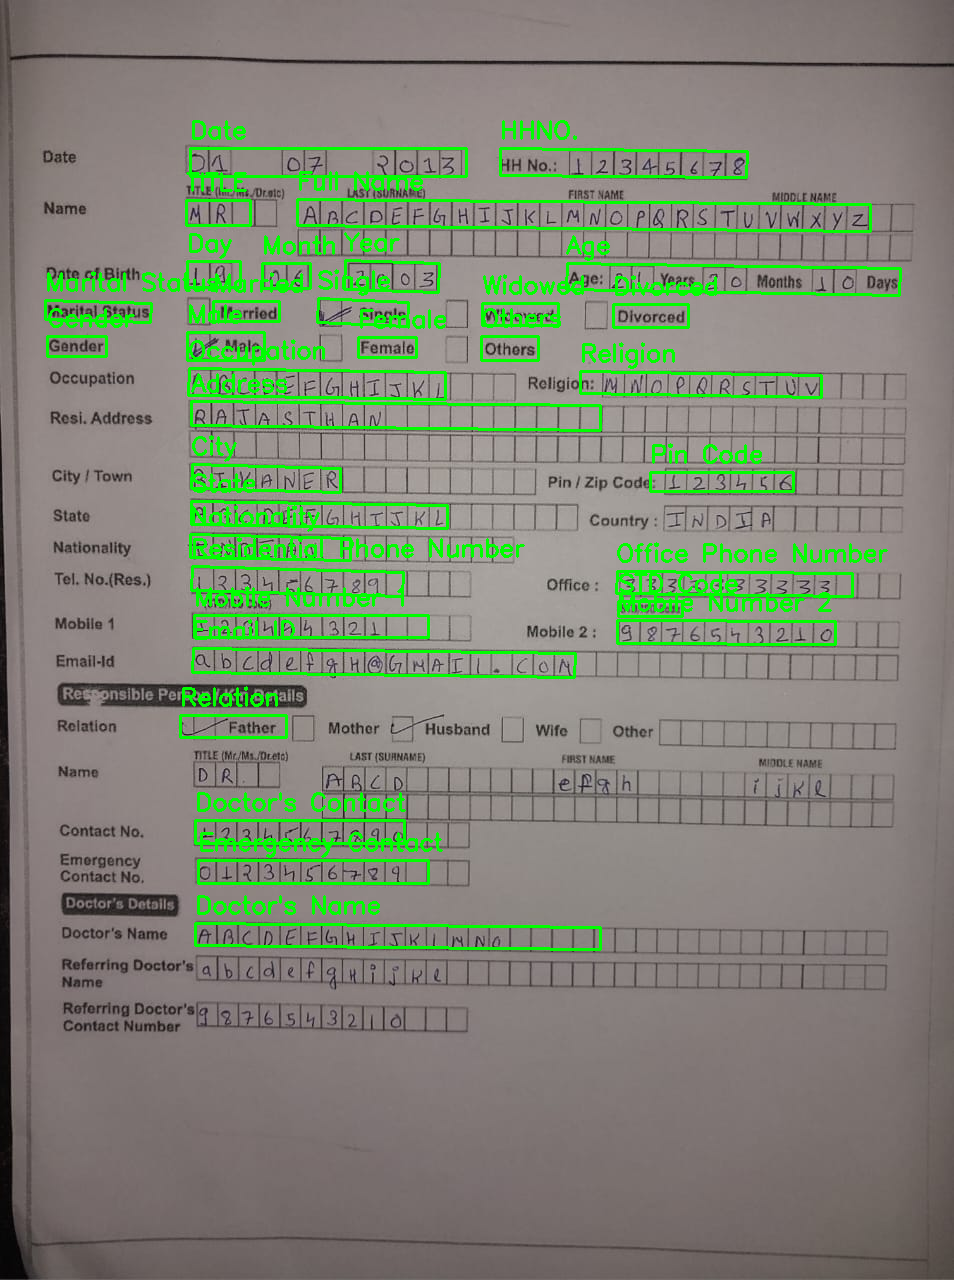

[2024/12/29 18:55:47] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.0157773494720459
[2024/12/29 18:55:47] ppocr DEBUG: cls num  : 1, elapsed : 0.011409282684326172
[2024/12/29 18:55:47] ppocr DEBUG: rec_res num  : 1, elapsed : 0.013133764266967773
[2024/12/29 18:55:47] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.013917207717895508
[2024/12/29 18:55:47] ppocr DEBUG: cls num  : 2, elapsed : 0.009858369827270508
[2024/12/29 18:55:47] ppocr DEBUG: rec_res num  : 2, elapsed : 0.012790441513061523
[2024/12/29 18:55:47] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.01202082633972168
[2024/12/29 18:55:47] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/12/29 18:55:47] ppocr DEBUG: rec_res num  : 0, elapsed : 2.1457672119140625e-06
[2024/12/29 18:55:47] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.021912097930908203
[2024/12/29 18:55:47] ppocr DEBUG: cls num  : 1, elapsed : 0.009879350662231445
[2024/12/29 18:55:47] ppocr DEBUG: rec_res num  : 1, elapsed : 0.012557744979858398
[2024/12/29 18:55:47] ppocr 

In [41]:

# Main function to extract fields and save to JSON
def extract_fields_to_json(image_path, fields_coordinates, output_json_path):
    extracted_data = []
    for field in fields_coordinates:
        field_name = field['field_name']
        coordinates = field['coordinates']
        _, cropped_image = crop_region(image_path, coordinates)
        extracted_text = extract_text_from_image(cropped_image)
        extracted_data.append({
            "field_name": field_name,
            "coordinates": coordinates,
            "extracted_text": " ".join(extracted_text)
        })

    # Save the extracted data to a JSON file
    with open(output_json_path, 'w') as json_file:
        json.dump(extracted_data, json_file, indent=4)

    print(f"Extracted data saved to {output_json_path}")
    return extracted_data

# Example usage
image_path = "/content/WhatsApp Image 2024-12-29 at 13.13.07.jpeg"
output_json_path = "/content/extracted_data.json"

# Visualize bounding boxes
draw_bounding_boxes(image_path, fields_coordinates)

# Extract data and save to JSON
extracted_data = extract_fields_to_json(image_path, fields_coordinates, output_json_path)

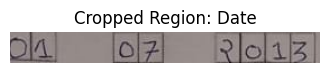

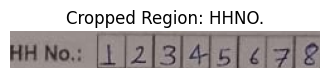

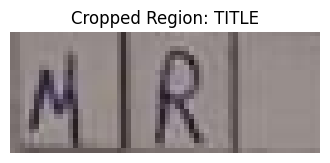

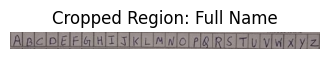

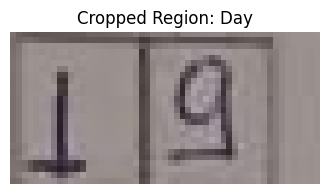

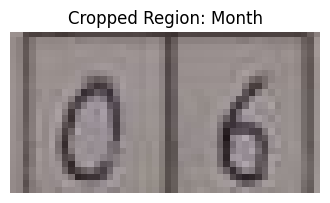

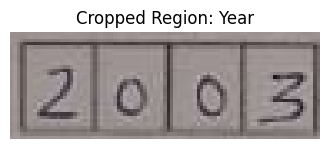

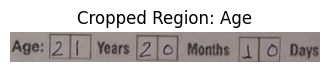

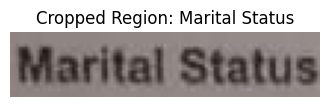

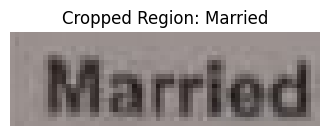

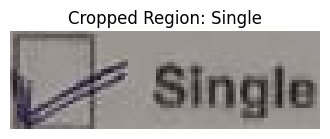

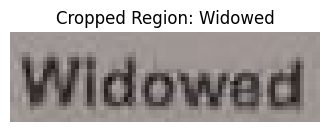

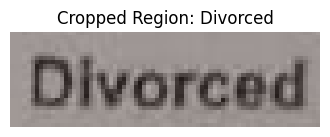

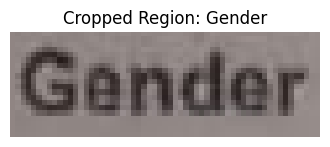

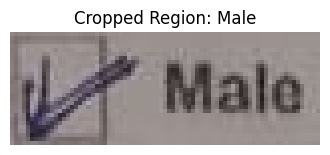

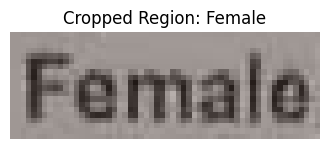

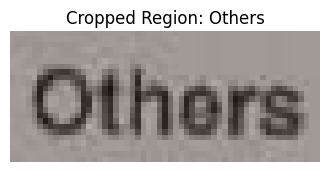

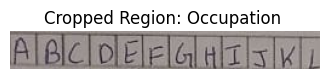

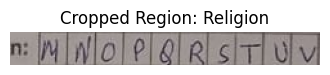

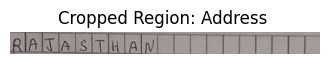

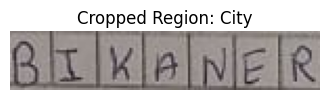

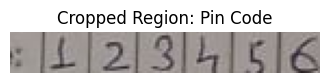

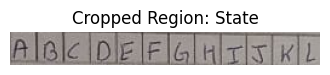

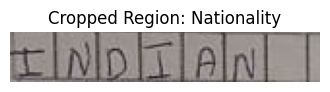

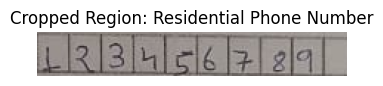

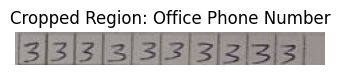

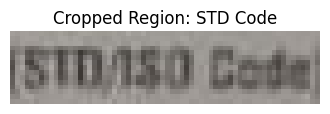

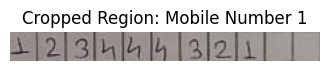

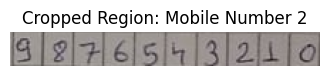

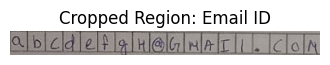

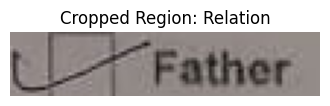

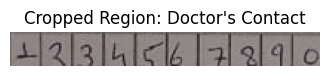

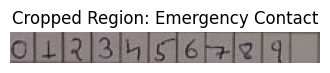

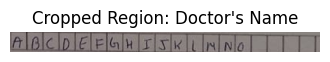

In [42]:
import cv2
import matplotlib.pyplot as plt

def visualize_cropped_regions(image_path, labeled_coordinates):
    """
    Visualizes cropped regions based on labeled coordinates.

    :param image_path: Path to the input image.
    :param labeled_coordinates: Dictionary with labels as keys and coordinates as values.
                                Coordinates should be in the form (x1, y1, x2, y2).
    """
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Unable to load image. Check the path.")
        return

    # Loop through the coordinates
    for field in labeled_coordinates:  # Iterate through the list of fields
        label = field['field_name']
        coords = field['coordinates']
        x1, y1 = int(coords[0][0]), int(coords[0][1])
        x2, y2 = int(coords[2][0]), int(coords[2][1])
        # Crop the region
        cropped_region = image[y1:y2, x1:x2]

        # Display the cropped region
        plt.figure(figsize=(4, 4))
        plt.imshow(cv2.cvtColor(cropped_region, cv2.COLOR_BGR2RGB))
        plt.title(f"Cropped Region: {label}")
        plt.axis('off')
        plt.show()



image_path = "/content/WhatsApp Image 2024-12-29 at 13.13.07.jpeg"  # Replace with your image path
visualize_cropped_regions(image_path, fields_coordinates)

[2024/12/29 19:08:47] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_ch

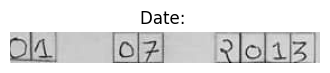

[2024/12/29 19:08:50] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.011104345321655273
[2024/12/29 19:08:50] ppocr DEBUG: cls num  : 1, elapsed : 0.011655092239379883
[2024/12/29 19:08:50] ppocr DEBUG: rec_res num  : 1, elapsed : 0.01858210563659668


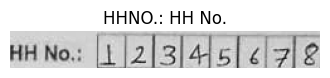

[2024/12/29 19:08:50] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.011113405227661133
[2024/12/29 19:08:50] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/12/29 19:08:50] ppocr DEBUG: rec_res num  : 0, elapsed : 1.430511474609375e-06


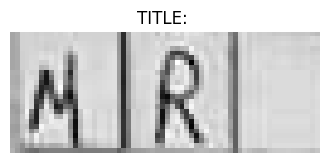

[2024/12/29 19:08:50] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.013331413269042969
[2024/12/29 19:08:50] ppocr DEBUG: cls num  : 1, elapsed : 0.008154153823852539
[2024/12/29 19:08:50] ppocr DEBUG: rec_res num  : 1, elapsed : 0.01645040512084961


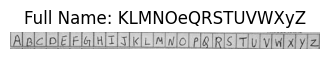

[2024/12/29 19:08:50] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.011602163314819336
[2024/12/29 19:08:50] ppocr DEBUG: cls num  : 1, elapsed : 0.00793313980102539
[2024/12/29 19:08:50] ppocr DEBUG: rec_res num  : 1, elapsed : 0.010007619857788086


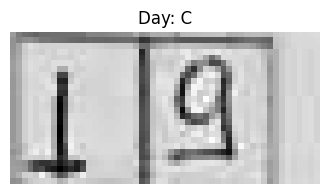

[2024/12/29 19:08:51] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.010752439498901367
[2024/12/29 19:08:51] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/12/29 19:08:51] ppocr DEBUG: rec_res num  : 0, elapsed : 1.6689300537109375e-06


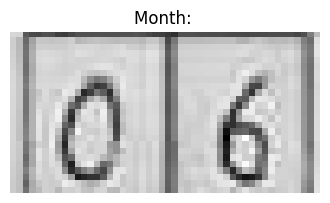

[2024/12/29 19:08:51] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.021433115005493164
[2024/12/29 19:08:51] ppocr DEBUG: cls num  : 1, elapsed : 0.015670061111450195
[2024/12/29 19:08:51] ppocr DEBUG: rec_res num  : 1, elapsed : 0.017197132110595703


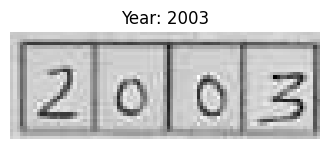

[2024/12/29 19:08:51] ppocr DEBUG: dt_boxes num : 5, elapsed : 0.015392541885375977
[2024/12/29 19:08:51] ppocr DEBUG: cls num  : 5, elapsed : 0.008773326873779297
[2024/12/29 19:08:51] ppocr DEBUG: rec_res num  : 5, elapsed : 0.033744096755981445


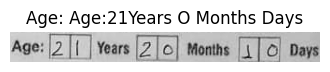

[2024/12/29 19:08:51] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01290750503540039
[2024/12/29 19:08:51] ppocr DEBUG: cls num  : 1, elapsed : 0.011876583099365234
[2024/12/29 19:08:51] ppocr DEBUG: rec_res num  : 1, elapsed : 0.017932891845703125


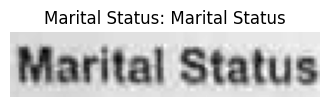

[2024/12/29 19:08:51] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.012652873992919922
[2024/12/29 19:08:51] ppocr DEBUG: cls num  : 1, elapsed : 0.010406494140625
[2024/12/29 19:08:51] ppocr DEBUG: rec_res num  : 1, elapsed : 0.00926518440246582


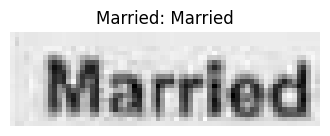

[2024/12/29 19:08:51] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.011009693145751953
[2024/12/29 19:08:51] ppocr DEBUG: cls num  : 1, elapsed : 0.007639646530151367
[2024/12/29 19:08:51] ppocr DEBUG: rec_res num  : 1, elapsed : 0.011845111846923828


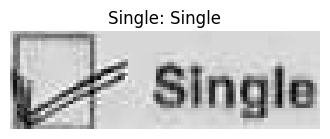

[2024/12/29 19:08:51] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.013162851333618164
[2024/12/29 19:08:51] ppocr DEBUG: cls num  : 1, elapsed : 0.009534597396850586
[2024/12/29 19:08:51] ppocr DEBUG: rec_res num  : 1, elapsed : 0.009557008743286133


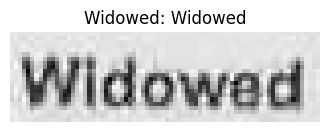

[2024/12/29 19:08:51] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.011609792709350586
[2024/12/29 19:08:51] ppocr DEBUG: cls num  : 1, elapsed : 0.017423152923583984
[2024/12/29 19:08:51] ppocr DEBUG: rec_res num  : 1, elapsed : 0.013463020324707031


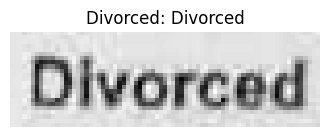

[2024/12/29 19:08:52] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01157999038696289
[2024/12/29 19:08:52] ppocr DEBUG: cls num  : 1, elapsed : 0.008207559585571289
[2024/12/29 19:08:52] ppocr DEBUG: rec_res num  : 1, elapsed : 0.013920307159423828


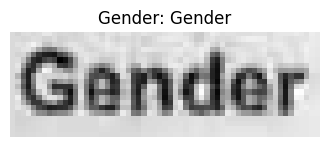

[2024/12/29 19:08:52] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.015229940414428711
[2024/12/29 19:08:52] ppocr DEBUG: cls num  : 1, elapsed : 0.00843954086303711
[2024/12/29 19:08:52] ppocr DEBUG: rec_res num  : 1, elapsed : 0.015042781829833984


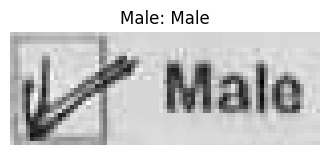

[2024/12/29 19:08:52] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.013550519943237305
[2024/12/29 19:08:52] ppocr DEBUG: cls num  : 1, elapsed : 0.009638547897338867
[2024/12/29 19:08:52] ppocr DEBUG: rec_res num  : 1, elapsed : 0.011623620986938477


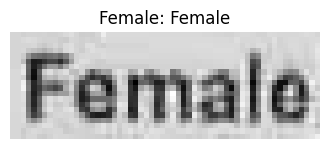

[2024/12/29 19:08:52] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.012155532836914062
[2024/12/29 19:08:52] ppocr DEBUG: cls num  : 1, elapsed : 0.009264230728149414
[2024/12/29 19:08:52] ppocr DEBUG: rec_res num  : 1, elapsed : 0.026543140411376953


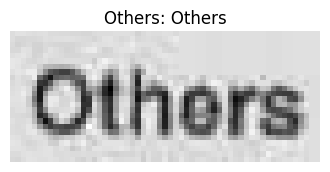

[2024/12/29 19:08:52] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01633596420288086
[2024/12/29 19:08:52] ppocr DEBUG: cls num  : 1, elapsed : 0.008771657943725586
[2024/12/29 19:08:52] ppocr DEBUG: rec_res num  : 1, elapsed : 0.009902238845825195


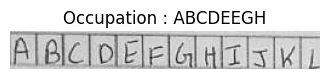

[2024/12/29 19:08:52] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.013625860214233398
[2024/12/29 19:08:52] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/12/29 19:08:52] ppocr DEBUG: rec_res num  : 0, elapsed : 1.6689300537109375e-06


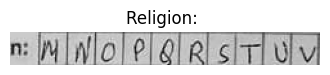

[2024/12/29 19:08:52] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.014938831329345703
[2024/12/29 19:08:52] ppocr DEBUG: cls num  : 2, elapsed : 0.008366823196411133
[2024/12/29 19:08:52] ppocr DEBUG: rec_res num  : 2, elapsed : 0.011371612548828125


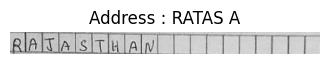

[2024/12/29 19:08:52] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.017140865325927734
[2024/12/29 19:08:52] ppocr DEBUG: cls num  : 1, elapsed : 0.00979924201965332
[2024/12/29 19:08:52] ppocr DEBUG: rec_res num  : 1, elapsed : 0.013525009155273438


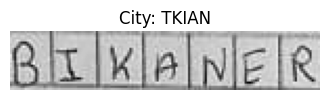

[2024/12/29 19:08:52] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.01826333999633789
[2024/12/29 19:08:52] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/12/29 19:08:52] ppocr DEBUG: rec_res num  : 0, elapsed : 1.430511474609375e-06


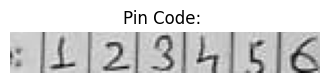

[2024/12/29 19:08:53] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.014652013778686523
[2024/12/29 19:08:53] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/12/29 19:08:53] ppocr DEBUG: rec_res num  : 0, elapsed : 1.430511474609375e-06


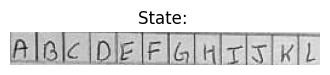

[2024/12/29 19:08:53] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.014714956283569336
[2024/12/29 19:08:53] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/12/29 19:08:53] ppocr DEBUG: rec_res num  : 0, elapsed : 2.1457672119140625e-06


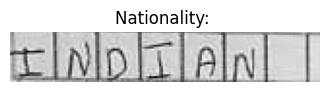

[2024/12/29 19:08:53] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.016918420791625977
[2024/12/29 19:08:53] ppocr DEBUG: cls num  : 1, elapsed : 0.011986732482910156
[2024/12/29 19:08:53] ppocr DEBUG: rec_res num  : 1, elapsed : 0.013401508331298828


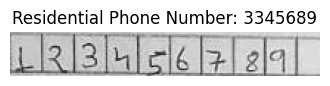

[2024/12/29 19:08:53] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.022723674774169922
[2024/12/29 19:08:53] ppocr DEBUG: cls num  : 1, elapsed : 0.008427143096923828
[2024/12/29 19:08:53] ppocr DEBUG: rec_res num  : 1, elapsed : 0.010215997695922852


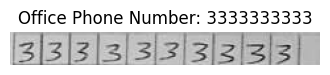

[2024/12/29 19:08:53] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01225137710571289
[2024/12/29 19:08:53] ppocr DEBUG: cls num  : 1, elapsed : 0.008573055267333984
[2024/12/29 19:08:53] ppocr DEBUG: rec_res num  : 1, elapsed : 0.009913206100463867


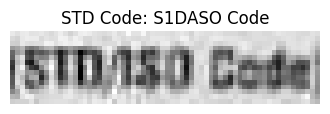

[2024/12/29 19:08:53] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.014754772186279297
[2024/12/29 19:08:53] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/12/29 19:08:53] ppocr DEBUG: rec_res num  : 0, elapsed : 1.430511474609375e-06


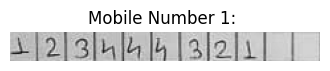

[2024/12/29 19:08:53] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.018131732940673828
[2024/12/29 19:08:53] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/12/29 19:08:53] ppocr DEBUG: rec_res num  : 0, elapsed : 1.6689300537109375e-06


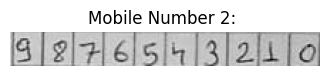

[2024/12/29 19:08:53] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.01272726058959961
[2024/12/29 19:08:53] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/12/29 19:08:53] ppocr DEBUG: rec_res num  : 0, elapsed : 1.9073486328125e-06


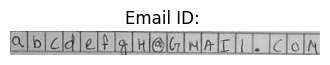

[2024/12/29 19:08:53] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.02016448974609375
[2024/12/29 19:08:53] ppocr DEBUG: cls num  : 1, elapsed : 0.008415937423706055
[2024/12/29 19:08:53] ppocr DEBUG: rec_res num  : 1, elapsed : 0.017873048782348633


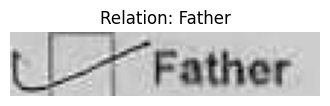

[2024/12/29 19:08:54] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.020342350006103516
[2024/12/29 19:08:54] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/12/29 19:08:54] ppocr DEBUG: rec_res num  : 0, elapsed : 1.9073486328125e-06


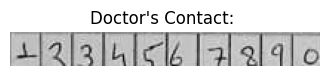

[2024/12/29 19:08:54] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.01273488998413086
[2024/12/29 19:08:54] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/12/29 19:08:54] ppocr DEBUG: rec_res num  : 0, elapsed : 1.430511474609375e-06


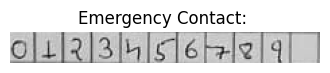

[2024/12/29 19:08:54] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.021108150482177734
[2024/12/29 19:08:54] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/12/29 19:08:54] ppocr DEBUG: rec_res num  : 0, elapsed : 2.1457672119140625e-06


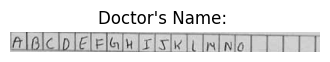

Date: 
HHNO.: HH No.
TITLE: 
Full Name: KLMNOeQRSTUVWXyZ
Day: C
Month: 
Year: 2003
Age: Age:21Years O Months Days
Marital Status: Marital Status
Married: Married
Single: Single
Widowed: Widowed
Divorced: Divorced
Gender: Gender
Male: Male
Female: Female
Others: Others
Occupation : ABCDEEGH
Religion: 
Address : RATAS A
City: TKIAN
Pin Code: 
State: 
Nationality: 
Residential Phone Number: 3345689
Office Phone Number: 3333333333
STD Code: S1DASO Code
Mobile Number 1: 
Mobile Number 2: 
Email ID: 
Relation: Father
Doctor's Contact: 
Emergency Contact: 
Doctor's Name: 


In [43]:
import cv2
from paddleocr import PaddleOCR
import matplotlib.pyplot as plt
import os
def extract_text_with_paddleocr(image_path, labeled_coordinates):
    """
    Extract text from image regions with grayscale preprocessing using PaddleOCR.

    :param image_path: Path to the input image.
    :param labeled_coordinates: Dictionary with labels as keys and coordinates as values.
                                Coordinates should be in the form (x1, y1, x2, y2).
    :return: Dictionary with labels and extracted text.
    """
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Unable to load image. Check the path.")
        return

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Initialize PaddleOCR
    ocr = PaddleOCR(use_angle_cls=True, lang='en')  # Set appropriate language

    # Dictionary to store extracted text
    extracted_text = {}

    # Loop through each labeled coordinate
    for field in labeled_coordinates:
        label = field['field_name']
        coords = field['coordinates']
        x1, y1 = int(coords[0][0]), int(coords[0][1])
        x2, y2 = int(coords[2][0]), int(coords[2][1])
        # Crop the region
        cropped_region = gray_image[y1:y2, x1:x2]


        temp_filename = f"temp_{label}.jpg"
        cv2.imwrite(temp_filename, cropped_region)

        # Extract text using PaddleOCR
        result = ocr.ocr(temp_filename)

        # Parse the OCR result
        if result and result[0]:
            extracted_text[label] = " ".join([line[1][0] for line in result[0]])
        else:
            extracted_text[label] = ""

        # Visualize the processed region and extracted text
        plt.figure(figsize=(4, 4))
        plt.imshow(cropped_region, cmap='gray')
        plt.title(f"{label}: {extracted_text[label]}")
        plt.axis('off')
        plt.show()

    return extracted_text



image_path = "/content/WhatsApp Image 2024-12-29 at 13.13.07.jpeg"  # Replace with your image path
extracted_data = extract_text_with_paddleocr(image_path, fields_coordinates)

# Print the extracted text
for label, text in extracted_data.items():
    print(f"{label}: {text}")